<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/cnn/cifar10_cnn_training_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

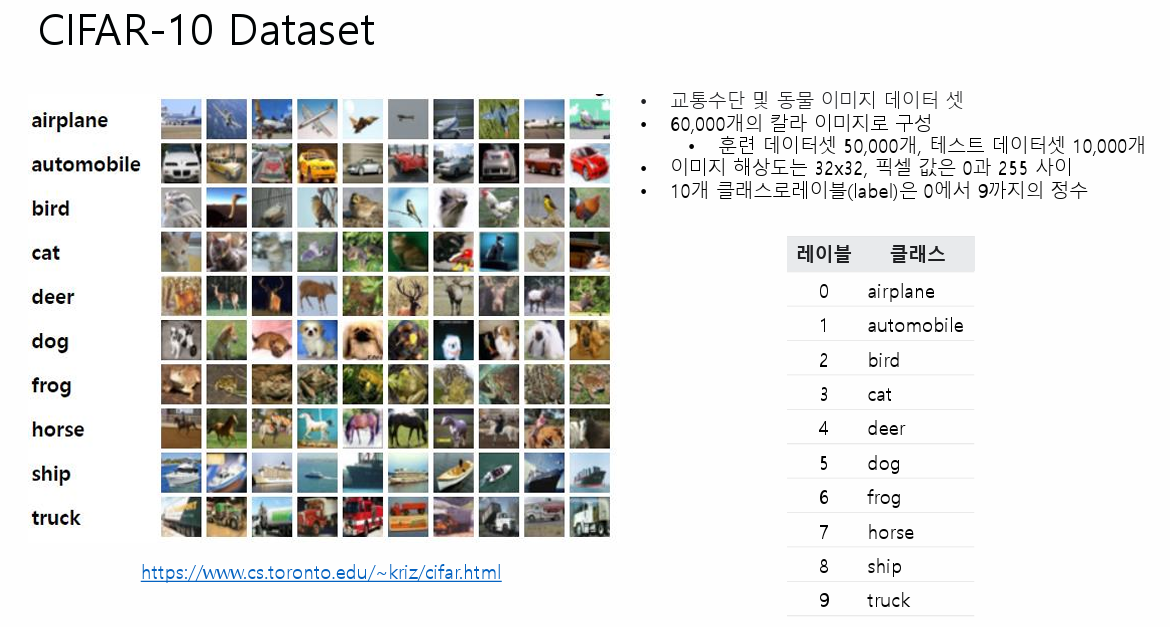

#1. 구글 텐서플로 라이브러리 임포트
CIFAR10 데이터셋은 컬러 이미지셋이므로 기존 neural network로는 분류가 쉽지 않다.

따라서 이미지 분류 전용의 CNN을 사용하려 한다.

CNN 역시 tensorflow계열의 딥러닝 라이브러리이므로 필요한 파이썬 라이브러리를 임포트한다.

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from sklearn.metrics import classification_report

#2. CIFAR10 데이터셋 다운로드
CIFAR10 데이터셋은 이미지 딥러닝 교육에 많이 사용되는 데이터셋으로 구글의 파이썬 명령 하나로 서버에서 다운로드 받을 수 있다.    
trainX는 트레이닝용 입력 이미지 데이터(비행기 이미지), trainY는 입력 이미지의 결과값 (비행기) 이다.

이미지 사이즈는 32x32이다.

trainX.shpae 명령으로 사이즈를 확인할 수 있다. testX, testY는 검증용 데이터셋 이다.

In [ ]:
((trainX, trainY), (testX, testY)) =

# 입력 데이터인 trainX 사이즈를 확인하기
print(trainX.shape)

# 실제 입력데이터 60000개 중 첫번째것의 실제 이미지 데이터를 확인하기
print(trainX[0])
# 실제 출력데이터 60000개 중 첫번째것을 확인하기
print(trainY[0])

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


#3. 데이터전처리

**입력 이미지 데이터 노말라이징** <br>
입력 이미지 데이터는 정수의 배열로 데이터가 구성되어 있다.   
이 데이터는 0 ~ 255까지의 숫자이다.   
이 숫자를 0 ~ 1사이의 값으로 변경하는 것이 텐서플로에서 처리하기 쉽다.

노말라이징은 입력 이미지 데이터인 trainX, testX가 대상이다.

In [ ]:
trainX =
testX =

# trainX[0]의 정수 데이터들이 노말라이징 된 것을 확인한다.
print(trainX[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


**출력 데이터셋 라벨 바이나리징** <br>
CIFAR10 출력 데이터셋 즉 라벨값은 0 ~ 9사이의 정수이다.   
이 정수를 바이너리 벡터화 하는 것이 라벨바이나리징인데 이것을 실행한다. <br>

**10자리 행렬에서 3번째자리에 체크

2 -> [0 0 1 0 0 0 0 0 0 0 0]

In [ ]:
print(trainY[0])

lb = LabelBinarizer()

trainY =
testY =

print(trainY[0]) # 라벨바이나리징 전후를 비교하기

[6]
[0 0 0 0 0 0 1 0 0 0]


**라벨 데이터의 숫자 맵핑** <br>
CIFAR10 10개의 데이터의 이름을 숫자와 맵핑한다.    
여기서는 참고로만 사용한다.

실제 코드에는 사용하지 않는다.   

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

**CNN 모델을 구성하기전 준비** <br>
CNN 모델을 구성하기 위해서 사전 준비를 한다.   
- 먼저 경사하강법을 실행하는 옵티마이저는 SGD로 정한다.
- 러닝레이트는 0,01로 한다.
- 입력 이미지는 32x32x3 이다.

In [ ]:
#옵티마이저 SGD 생성
opt =


In [ ]:
#이미지 사이즈 지정
height =
width =
depth =


In [ ]:
#모델  시퀀스 생성
model =


In [ ]:

#이미지 데이터는 일반적으로 3차원 배열로 표현됩니다: 높이(height), 너비(width),  채널(depth)
inputShape = (height, width, depth)

#채널은 이미지의 컬러 채널을 의미하며, 흑백 1, 컬러 이미지 > RGB 채널이므로 3으로 설정한다.
#옵션1: "channels_last" 이 포맷에서는 채널 차원이 배열의 마지막 차원으로 오게 됩니다.
#따라서 입력 형태는 (높이, 너비, 채널) 순서로 되며, RGB 컬러 이미지의 경우 (높이, 너비, 3) 형태가 됩니다.

#옵션2: "channels_first" 채널 차원이 배열의 첫 번째 차원으로 오게 됩니다. :: (depth, height, width)
#따라서 입력 형태는 (채널, 높이, 너비) 순서로 된다
#예를 들어 RGB 컬러 이미지의 경우 (3, 높이, 너비) 형태가 됩니다.

if K.image_data_format() ==

	inputShape =

#3. 모델의 구성


- 1개의 컨볼루션 레이어, 입력이미지 해상도: 32x32x3
- 컨볼루션 레이어의 액티베이션 함수는 relu

- 1개의 댄스레이어(기존 신경망 레이어)
- 댄스 레이어의 액티베이션 함수는 softmax


In [ ]:
model.add( )
model.add( )
model.add( )
model.add( )
model.add( )

##8. 모델의 구성

- 옵티마이저(SGD)
- 손실함수 : "categorical_crossentropy"
- 메트릭 : "accuracy"

CNN 신경망을 구성한다.

In [ ]:
model.compile(  )


#4. 모델 훈련

**모델 트레이닝** <br>

- trainX, trainY 데이터셋을 이용해서 트레이닝 데이터를 진행한다.   
- testX testY로 검증을 한다.   
- 배치 사이즈 : 훈련 데이터 사이즈는 32
- 총 epochs는 40이다.

In [ ]:
H = model.fit( )


Epoch 1/40
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8053 - accuracy: 0.3647 - val_loss: 1.6086 - val_accuracy: 0.4459
Epoch 2/40
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5214 - accuracy: 0.4689 - val_loss: 1.4548 - val_accuracy: 0.4800
Epoch 3/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3797 - accuracy: 0.5194 - val_loss: 1.3533 - val_accuracy: 0.5185
Epoch 4/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2987 - accuracy: 0.5493 - val_loss: 1.3351 - val_accuracy: 0.5182
Epoch 5/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2493 - accuracy: 0.5638 - val_loss: 1.3521 - val_accuracy: 0.5202
Epoch 6/40
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2175 - accuracy: 0.5760 - val_loss: 1.2942 - val_accuracy: 0.5411
Epoch 7/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1890 - accuracy: 0.5873 - val_loss: 1.2915 - val_accuracy

#5. 예측

**트레이닝 결과 확인하기** <br>
트레이닝 한 결과를 확인한다.   
실제로 CIFAR10 데이터셋은 CNN을 사용해도 예측률이 60%정도로 그리 좋지는 않다.  

* 데이터셋의 해상도가 너무 낮고 데이터숫자가 많지 않아서 발생하는 현상이다.

In [ ]:
#훈련 결과 예측
predictions =

#훈련 결과 출력
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.69      0.63      0.66      1000
  automobile       0.78      0.66      0.72      1000
        bird       0.48      0.40      0.44      1000
         cat       0.40      0.49      0.44      1000
        deer       0.45      0.64      0.53      1000
         dog       0.52      0.47      0.50      1000
        frog       0.80      0.59      0.68      1000
       horse       0.66      0.68      0.67      1000
        ship       0.78      0.69      0.73      1000
       truck       0.63      0.75      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.60     10000
weighted avg       0.62      0.60      0.60     10000



#6. 추론 파일 저장

**CNN 추론파일 저장하기** <br>
트레이닝된 추론파일을 다음에 사용하기 위해서 디스크에 저장한다.

생성된 H5 파일을 로컬에 저장한다

In [ ]:
model.save('cifar10_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
